<a href="https://colab.research.google.com/github/maushamkumar/Pandas/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/train (1).csv')

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=b2c491ec8c9297a2e929f411d1b8e6fc613cf411b30f03fb30cadf9fc7e1c273
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile.to_file("train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Lifecycle of this project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [ ]:
## Data Analysis Phase
## Manin aim to understand more about the data

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The numerical Variable
3. Distribution of the Numerical Variable
4. Categorical Variable
5. Cardinality of Categorical Variable
6. Outliers
7. Relationship between independent and dependent feature(SalesPrice)

### Missing Values

In [ ]:
missing_value = data.isnull().sum()
missing_value[missing_value > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Here we will check the percentage of nan values present in each feature
# make the list of features which has missing values
features_with_na = [features for features in data.columns if data[features].isnull().sum() > 1]

# Print the feature name and the percentage of missing values
for feature in features_with_na:
  print(feature, np.round(data[feature].isnull().mean(), 4), ' %missing values')

LotFrontage 0.1774  %missing values
Alley 0.9377  %missing values
MasVnrType 0.5973  %missing values
MasVnrArea 0.0055  %missing values
BsmtQual 0.0253  %missing values
BsmtCond 0.0253  %missing values
BsmtExposure 0.026  %missing values
BsmtFinType1 0.0253  %missing values
BsmtFinType2 0.026  %missing values
FireplaceQu 0.4726  %missing values
GarageType 0.0555  %missing values
GarageYrBlt 0.0555  %missing values
GarageFinish 0.0555  %missing values
GarageQual 0.0555  %missing values
GarageCond 0.0555  %missing values
PoolQC 0.9952  %missing values
Fence 0.8075  %missing values
MiscFeature 0.963  %missing values


#### Since they are many missing values, we need to find the relationship between missing values and Sales Price

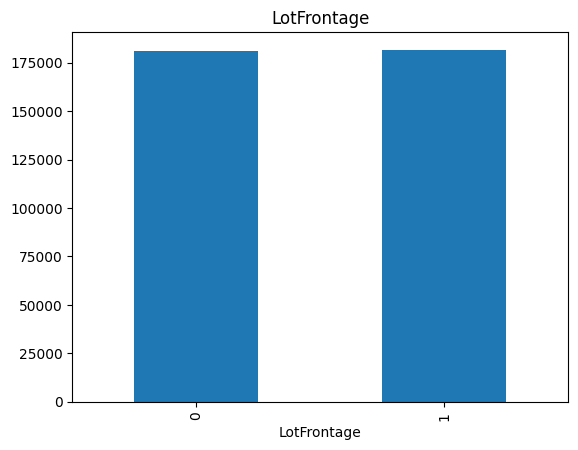

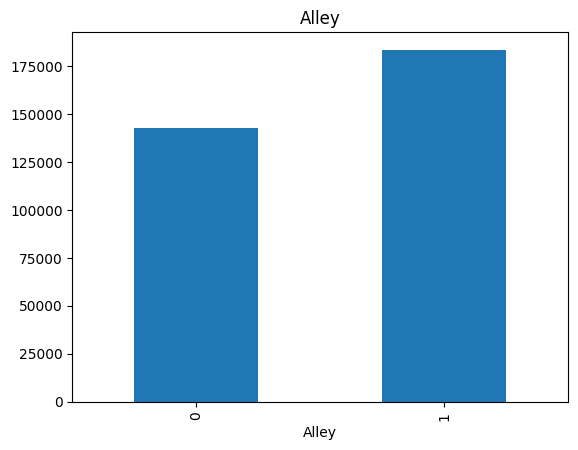

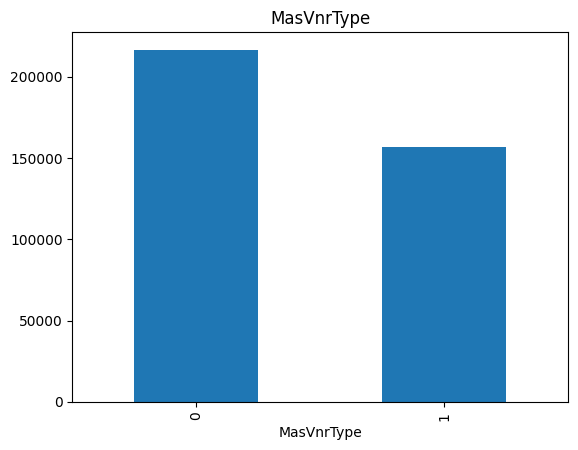

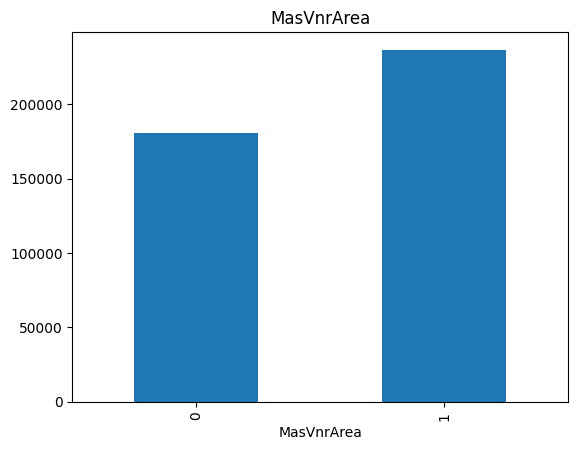

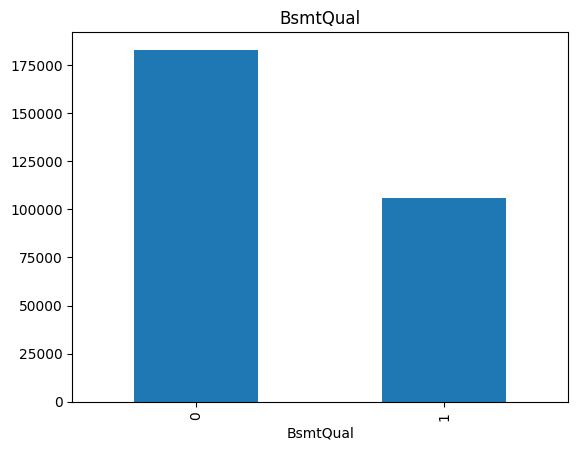

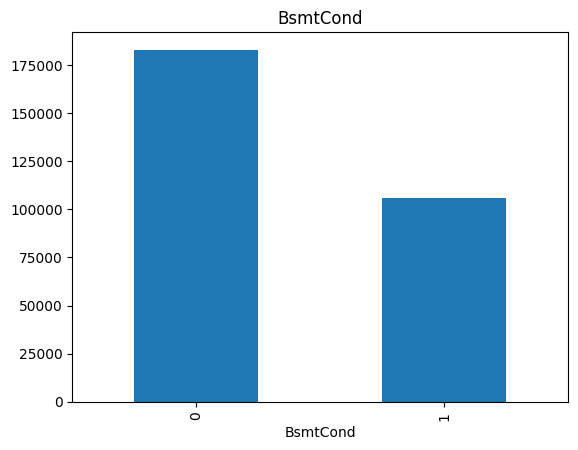

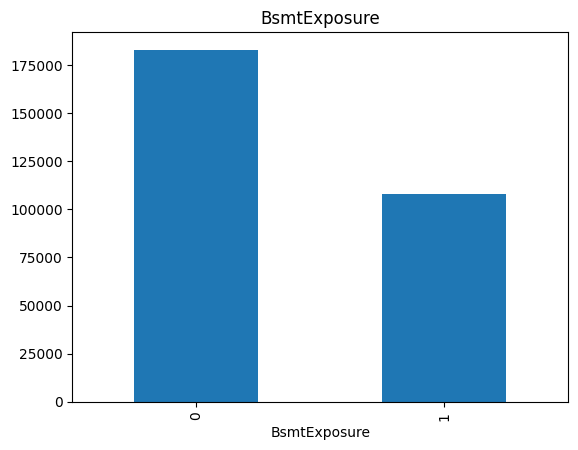

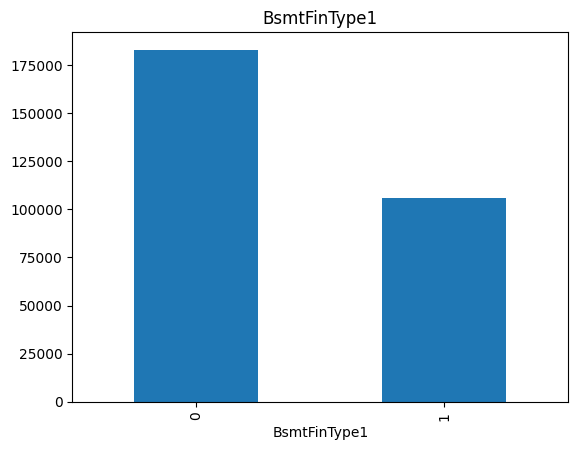

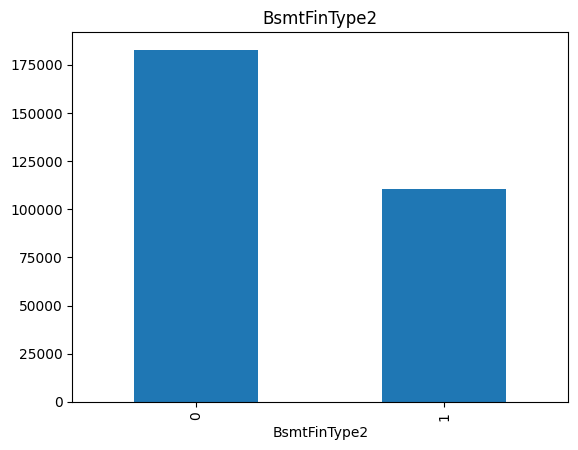

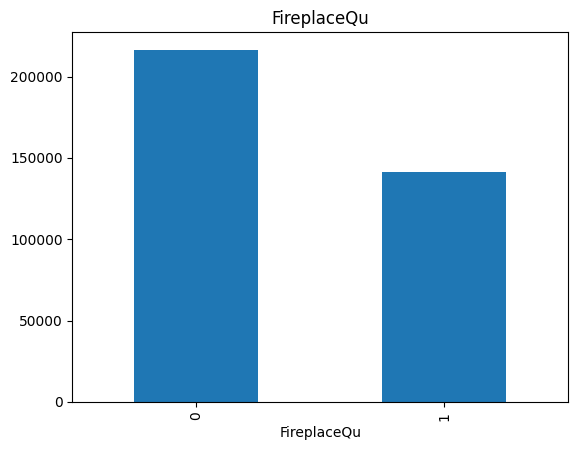

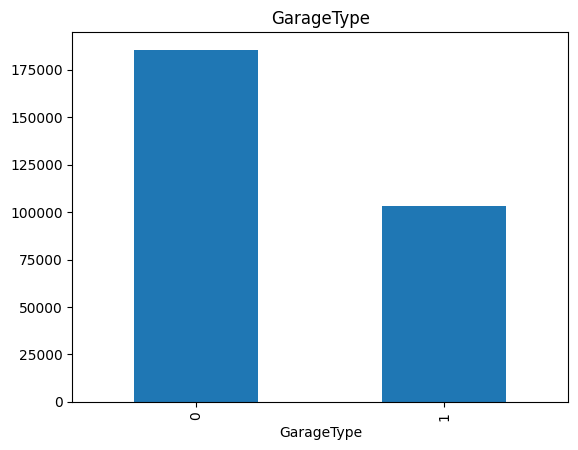

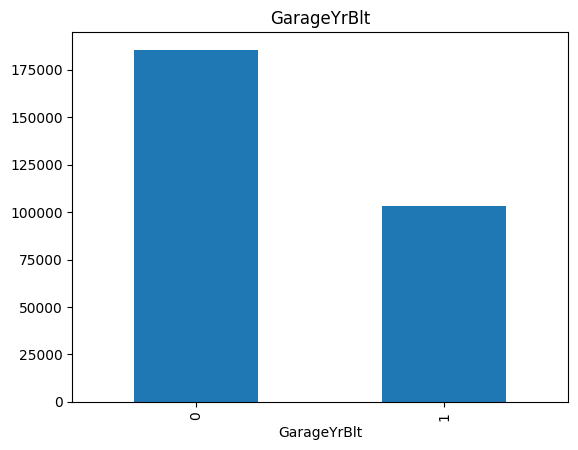

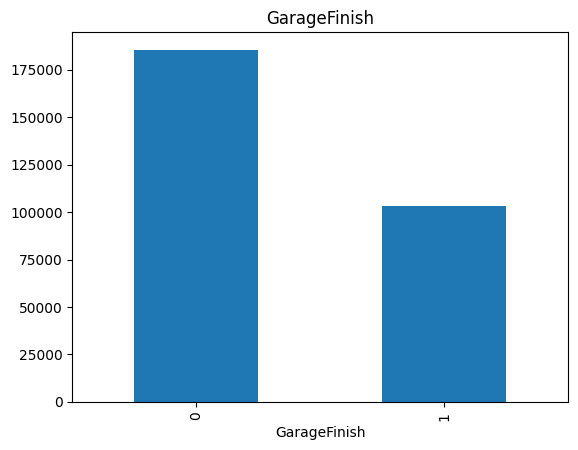

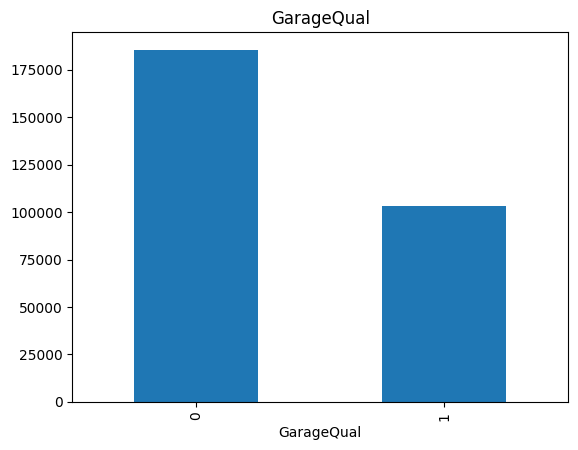

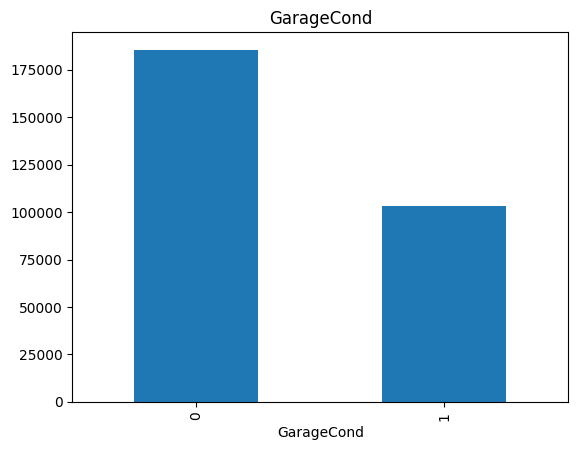

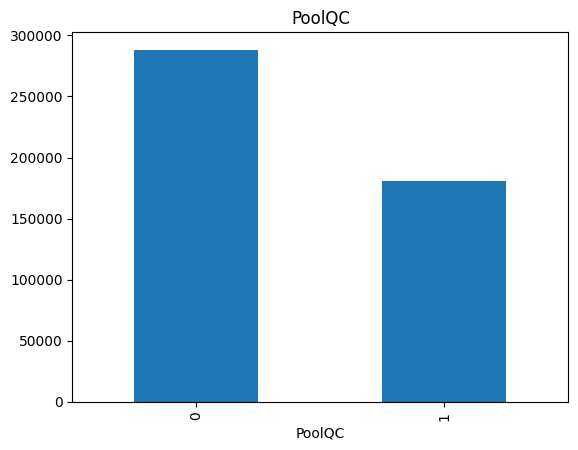

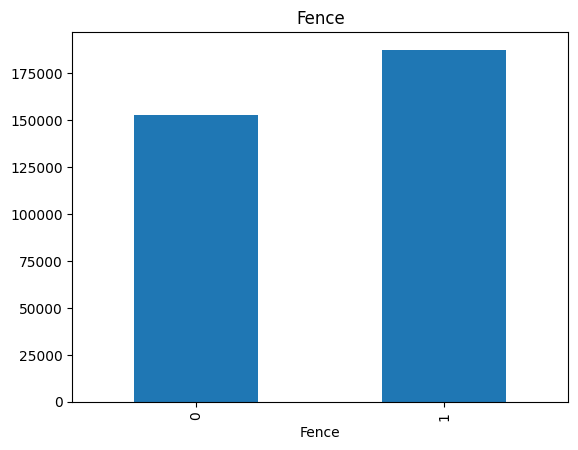

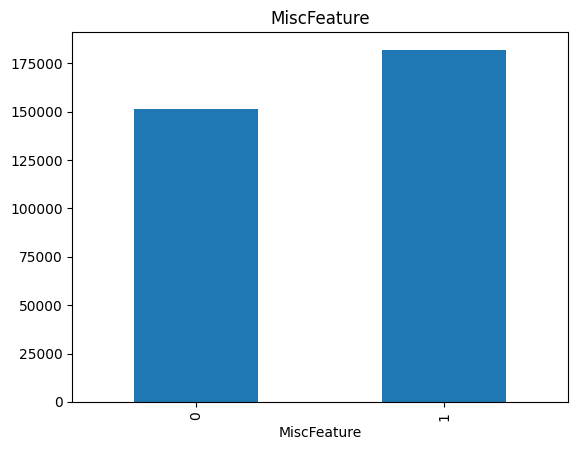

In [ ]:
for feature in features_with_na:
  data = data.copy()

  # let's make a variable that indicates 1 if the observation is null and 0 if not
  data[feature] = np.where(data[feature].isnull(), 1, 0)

  # Let's calculate the mean SalePrice where the information is missing or present
  data.groupby(feature)['SalePrice'].mean().plot.bar()
  plt.title(feature)
  plt.show()

`Frontage` - for missing and not missing both have the same price

`Alley` - Missing value has a higher sale price than non-missing

`MasVnrType` - Non-missing values have a higher sale price than the missing value

`MasVnrArea` - Missing value has a higher sale price than non-missing

`BsmtQual` - Non-missing values

`BsmtCond` - Non-missing values

`BsmtExposure` - Non-missing values

`BsmtFinType1` - Non-Missing values

`BsmtFinType2` - Non-Missing values

`FireplaceQu` - Non-Missing values

`GarageType` - Non-Missing values

`GarageYrBlt` - Non-Missing values

`GarageFinish` - Non-Missing values

`GarageQual` - Non-Missing values

`GarageCond` - Non-Missing values

`PoolQC` - Non-Missing values

`Fence` - Missing values

`MiscFeature` - Non-Missing values


Here with the relation between the missing values and the dependent variable(SalePrice) is clearly visible. So we need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [ ]:
print('ID of Houses with Missing Values:', data[data['Electrical'].isnull()]['Id'])

ID of Houses with Missing Values: 1379    1380
Name: Id, dtype: int64


In [ ]:
print('ID of Houses' , len(data.Id))

ID of Houses 1460


# Numberical Variable


In [ ]:
# List of numerical variables

numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

print('Number of numerical variables: ', len(numerical_features))

# Show the numerical variables
data[numerical_features].head()

Number of numerical variables:  53


,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,0,8450,1,7,5,2003,2003,0,...,0,0,0,1,1,1,0,2,2008,208500
1,2,20,0,9600,1,6,8,1976,1976,1,...,0,0,0,1,1,1,0,5,2007,181500
2,3,60,0,11250,1,7,5,2001,2002,0,...,0,0,0,1,1,1,0,9,2008,223500
3,4,70,0,9550,1,7,5,1915,1970,1,...,0,0,0,1,1,1,0,2,2006,140000
4,5,60,0,14260,1,8,5,2000,2000,0,...,0,0,0,1,1,1,0,12,2008,250000


In [ ]:
data[numerical_features].shape

(1460, 53)

#### Datetime variables
From the dataset we have 4 year variables. We have extract information from the DateTime variable like no of years or no od days. One example in this specific scenario can be difference in year between the year the house was built and the year the house was sold. we will be performing this analysis in the Feature Engineering which is the text video.

In [ ]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs Year Sold')

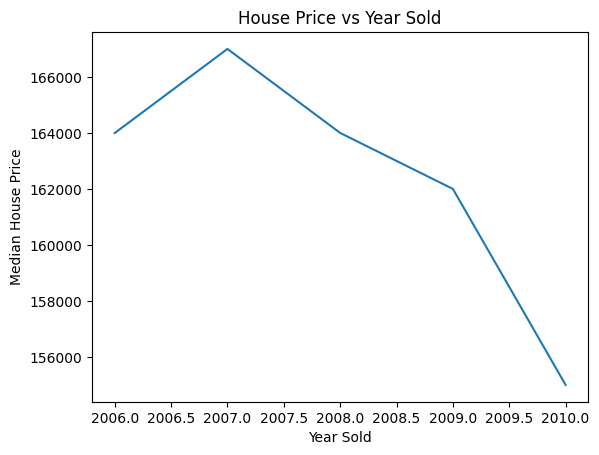

In [ ]:
# Let's check whether there is a relationship between year the house is sold and the sales price

data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

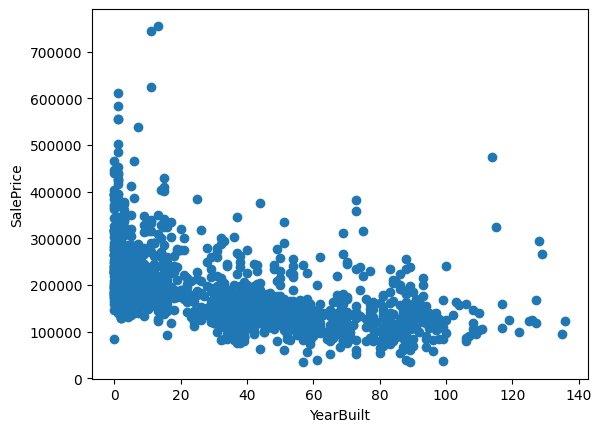

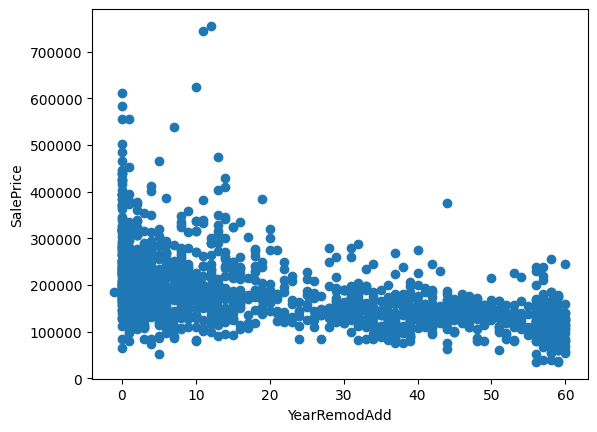

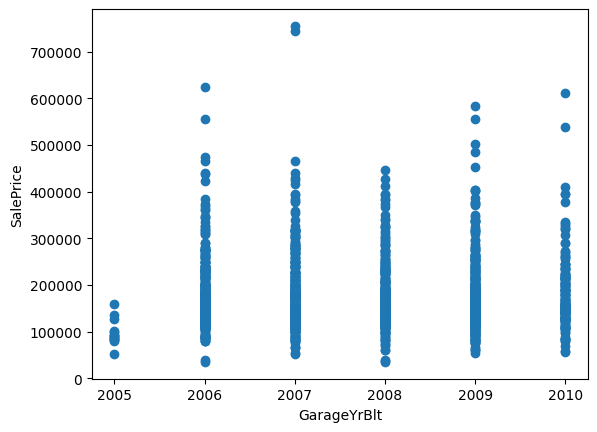

In [ ]:
# Compare the difference between All years features with SalePrice
for feature in year_feature:
  if feature != 'YrSold':

    dataset = data.copy()
    # We will capture the difference between year variable and year the house was sold for
    dataset[feature] = dataset['YrSold'] - dataset[feature]

    plt.scatter(dataset[feature], dataset['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
## Numerical variables are usually of 2 types
## 1. Continous variable and Discrete variable

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique()) < 25 and feature not in year_feature + ['Id']]

print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 34


In [ ]:
data[discrete_feature].head()

,MSSubClass,LotFrontage,Alley,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,...,GarageCars,GarageQual,GarageCond,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold
0,60,0,1,7,5,0,0,0,0,0,...,2,0,0,0,0,1,1,1,0,2
1,20,0,1,6,8,1,0,0,0,0,...,2,0,0,0,0,1,1,1,0,5
2,60,0,1,7,5,0,0,0,0,0,...,2,0,0,0,0,1,1,1,0,9
3,70,0,1,7,5,1,0,0,0,0,...,3,0,0,0,0,1,1,1,0,2
4,60,0,1,8,5,0,0,0,0,0,...,3,0,0,0,0,1,1,1,0,12


In [ ]:
# Let's Find the relationship between discrete and Sale Price

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

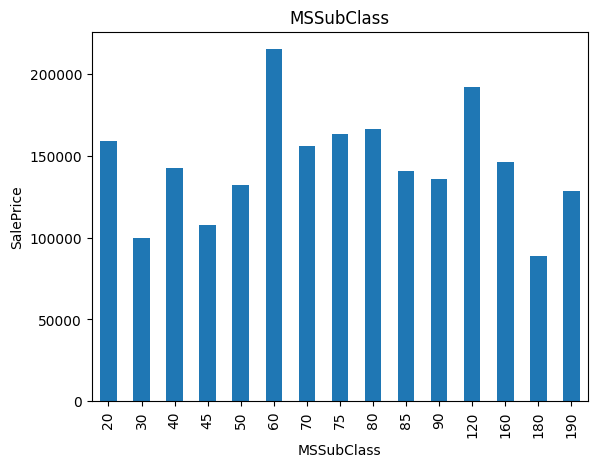

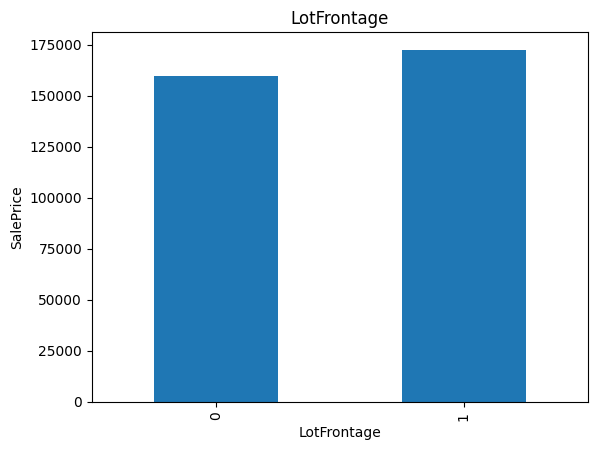

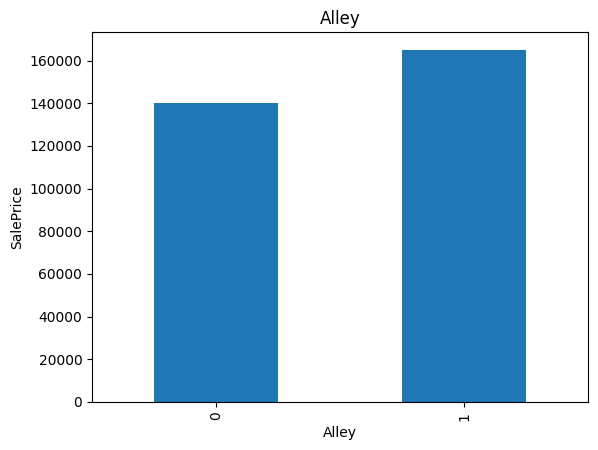

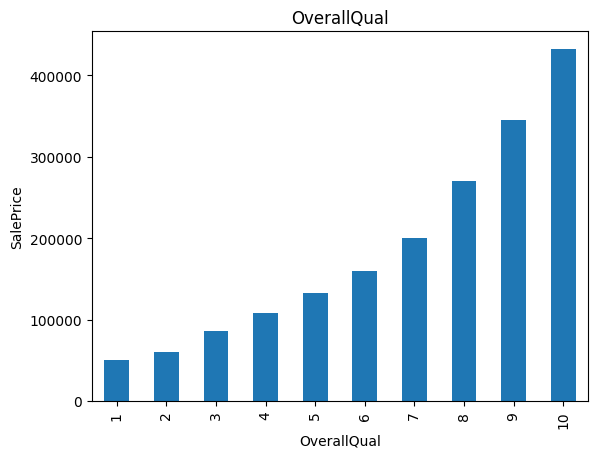

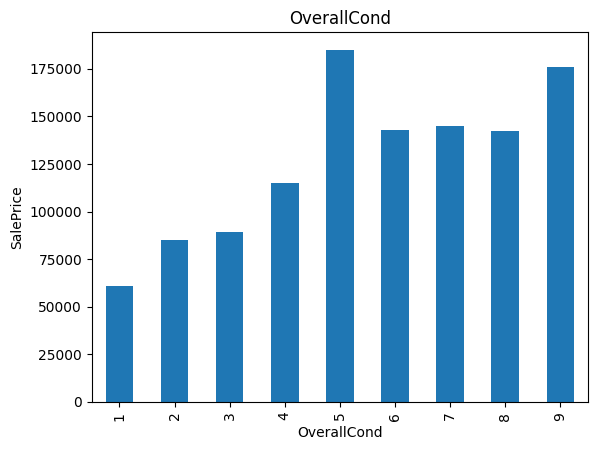

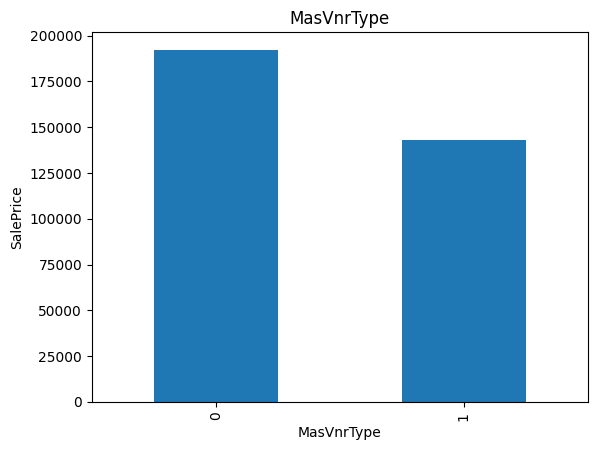

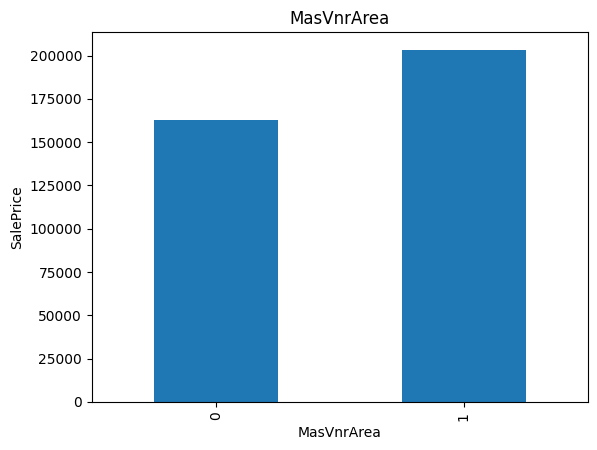

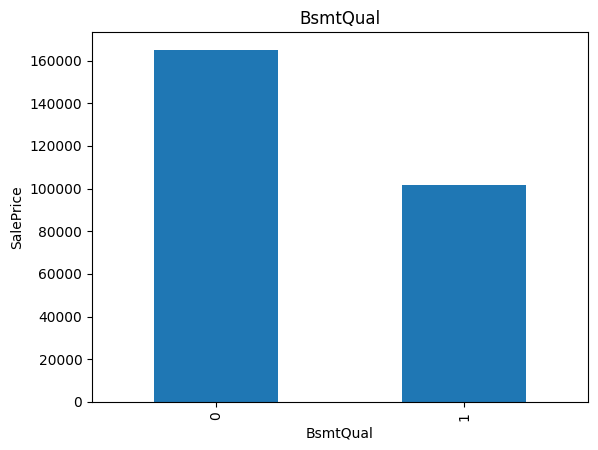

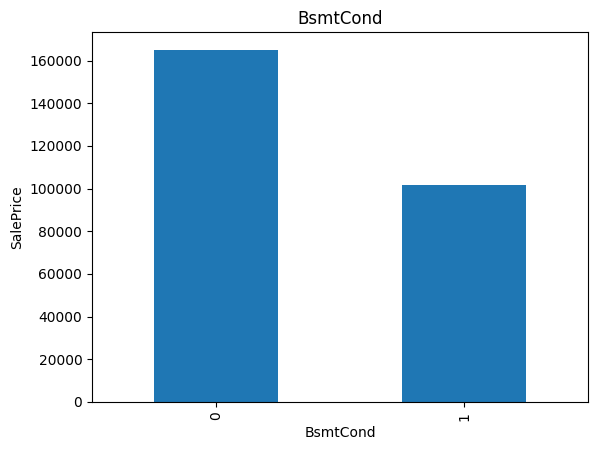

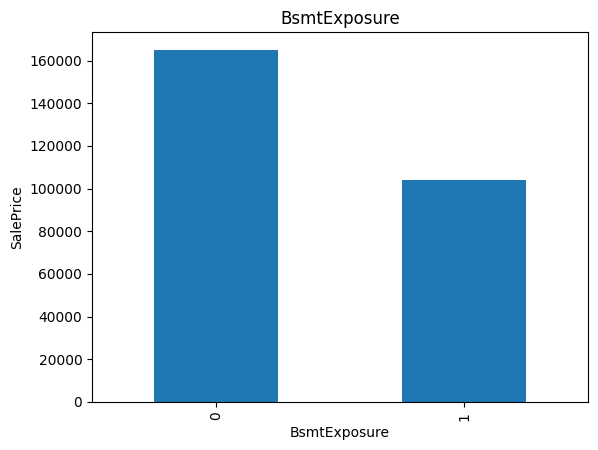

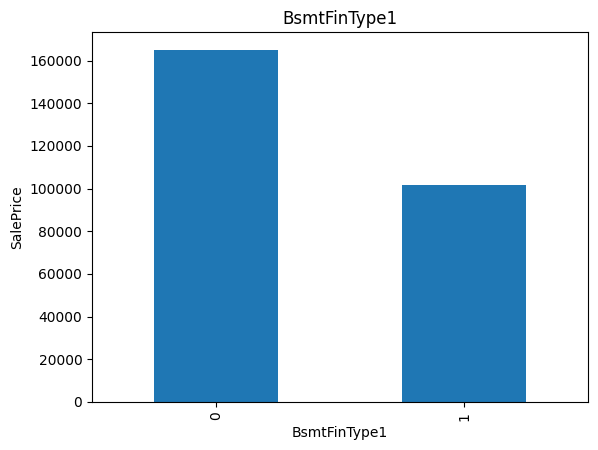

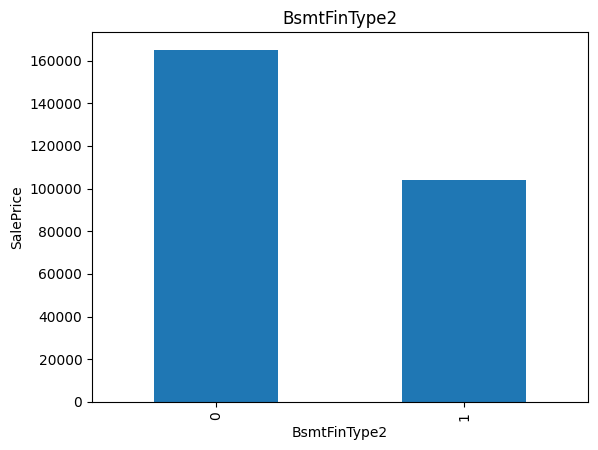

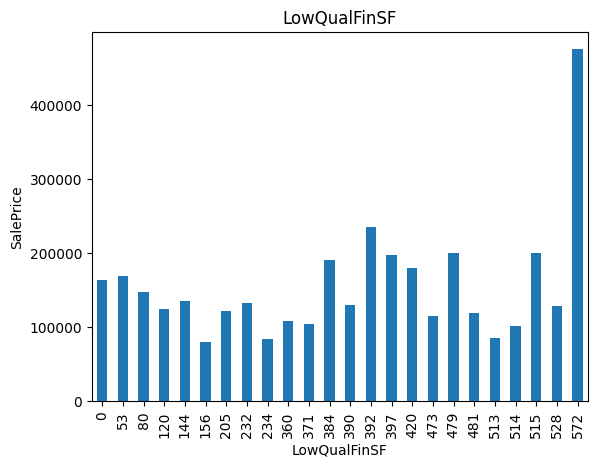

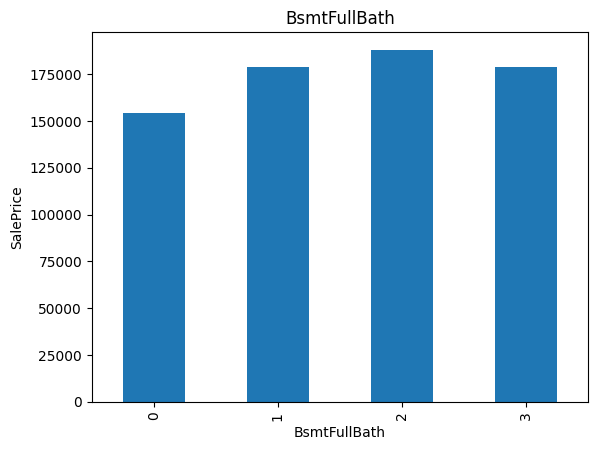

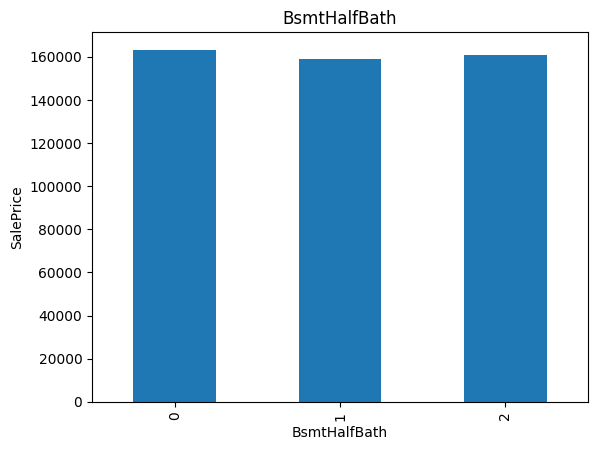

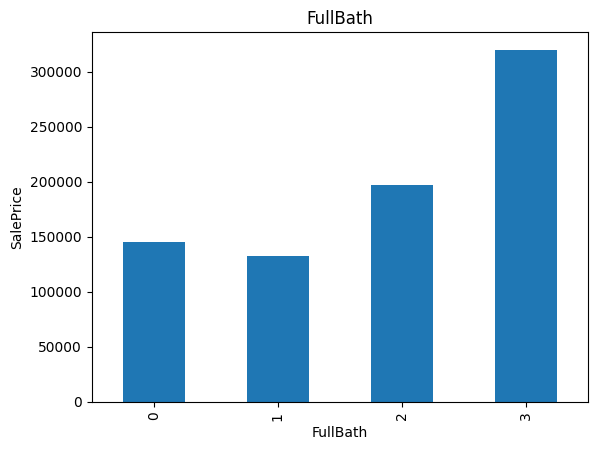

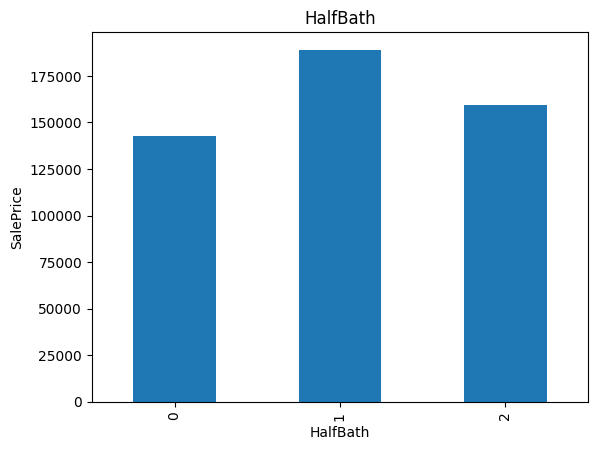

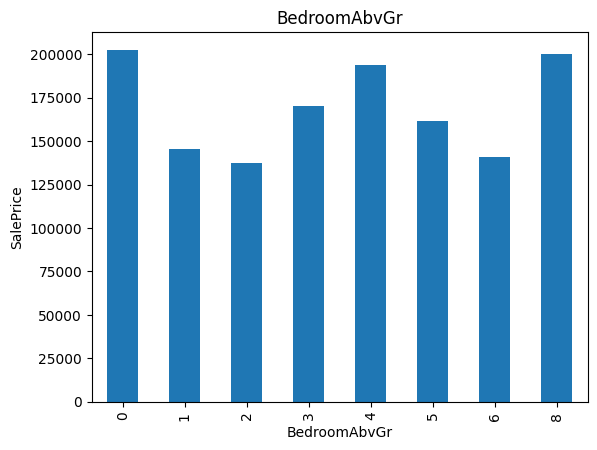

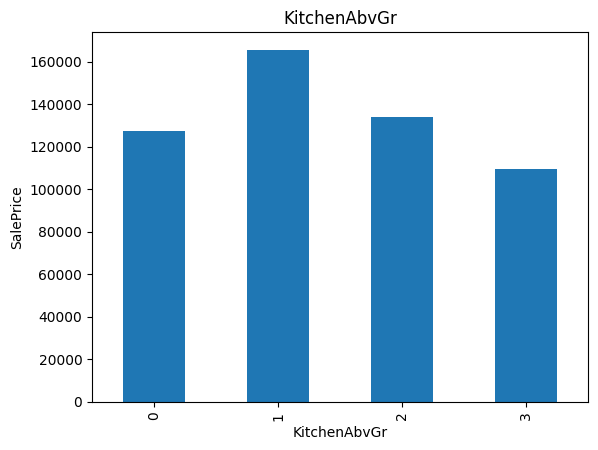

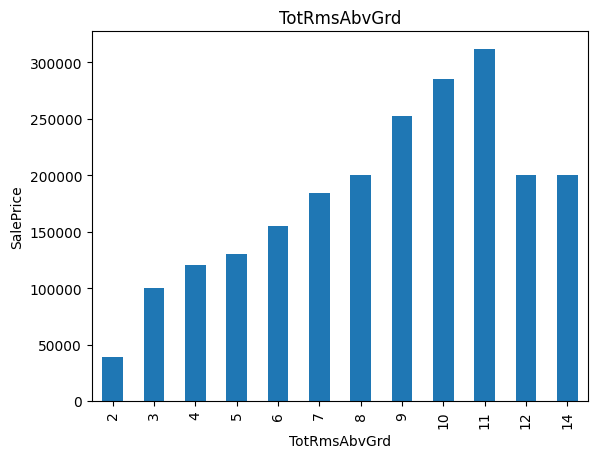

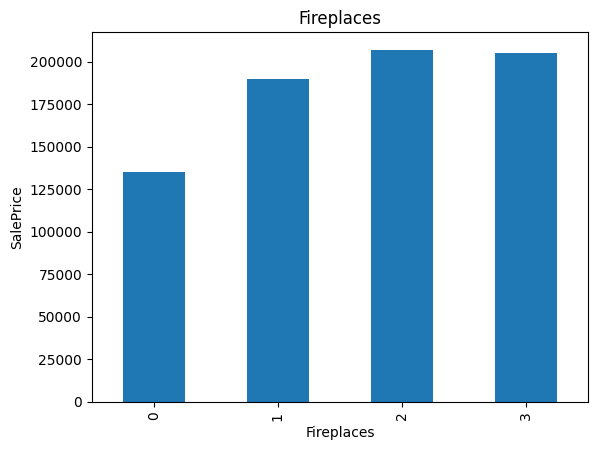

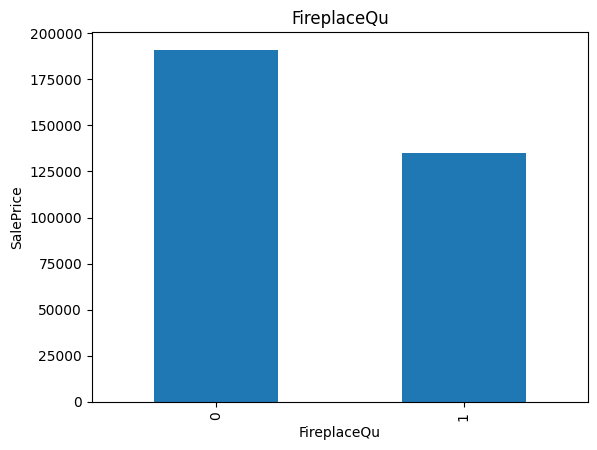

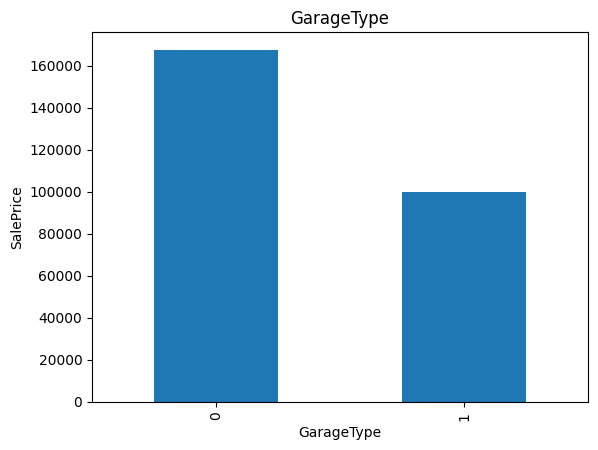

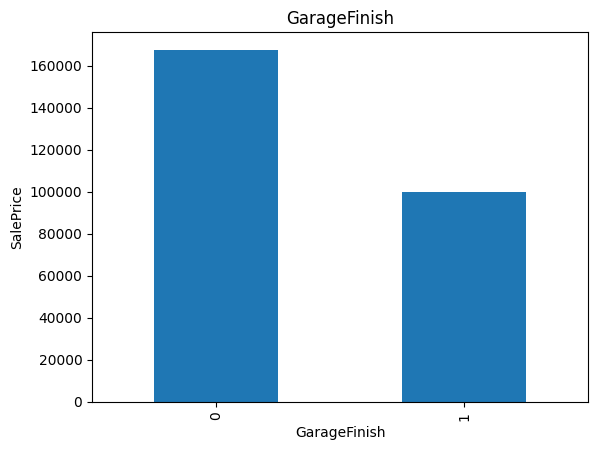

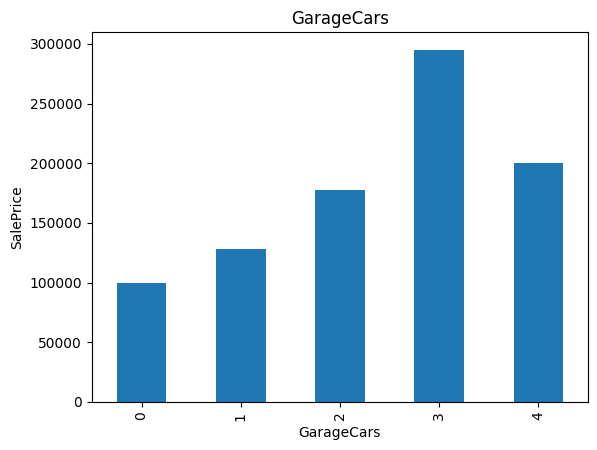

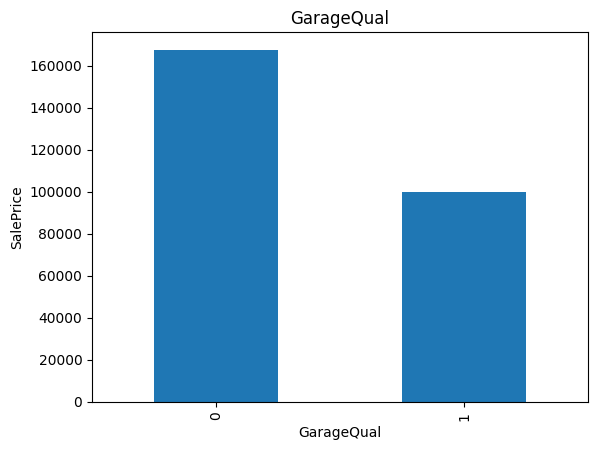

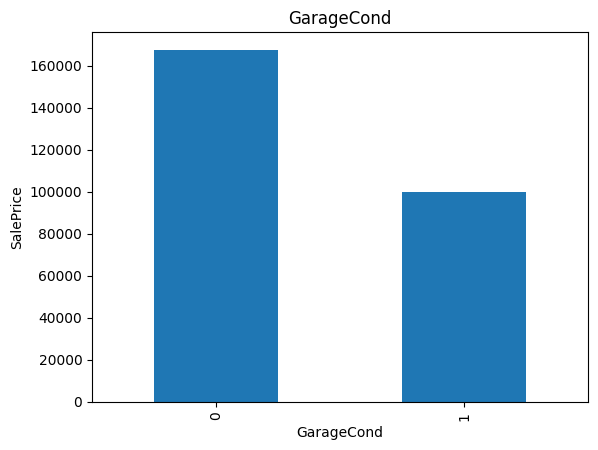

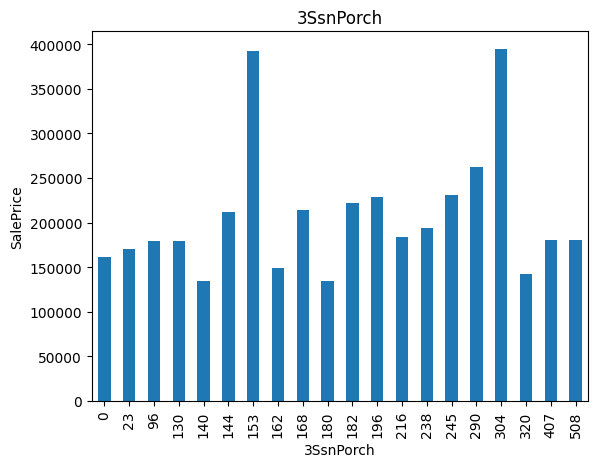

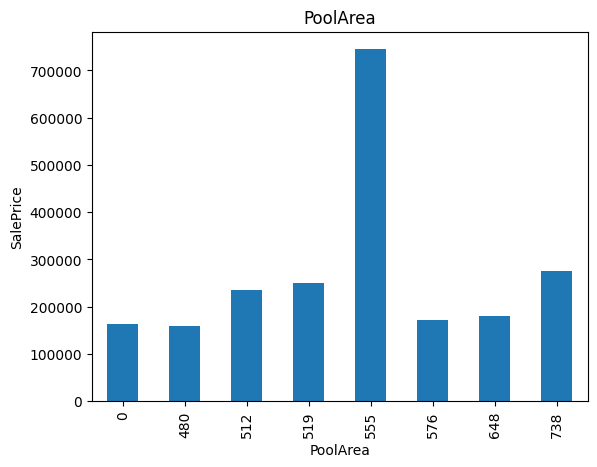

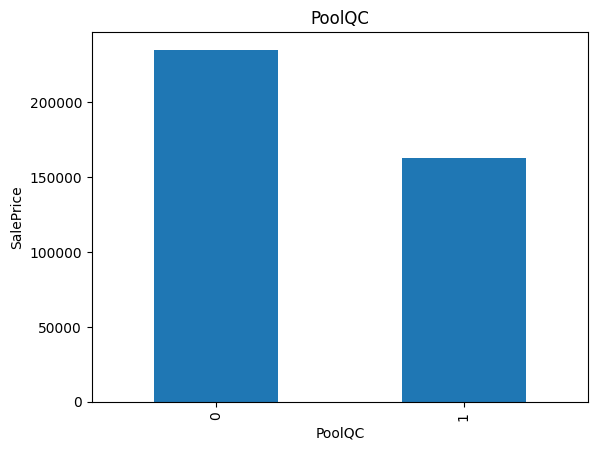

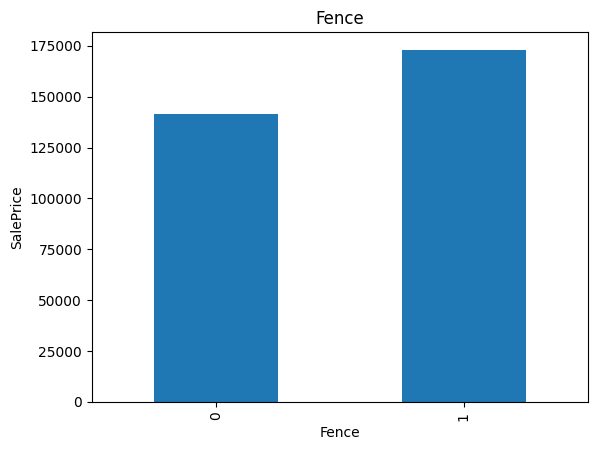

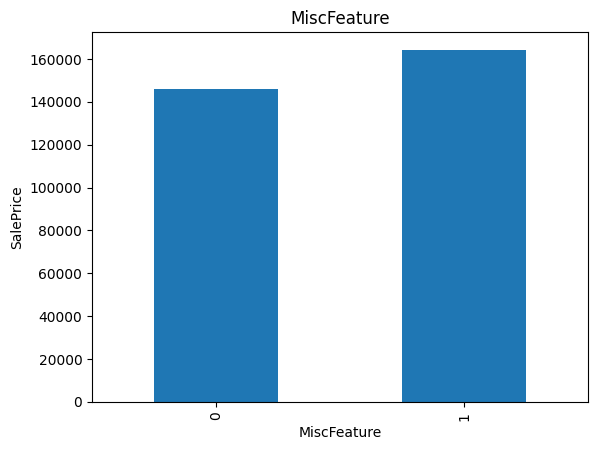

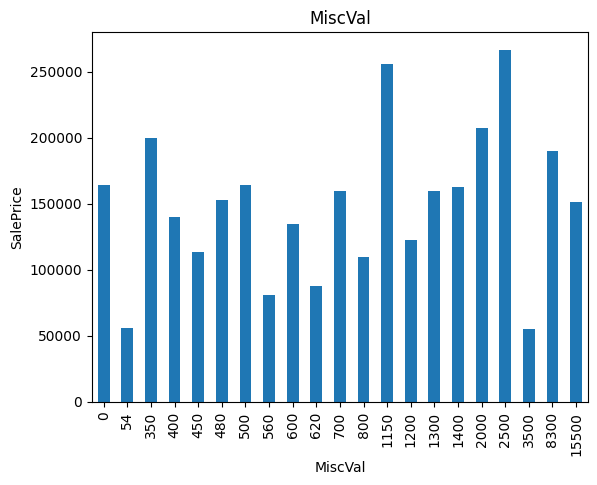

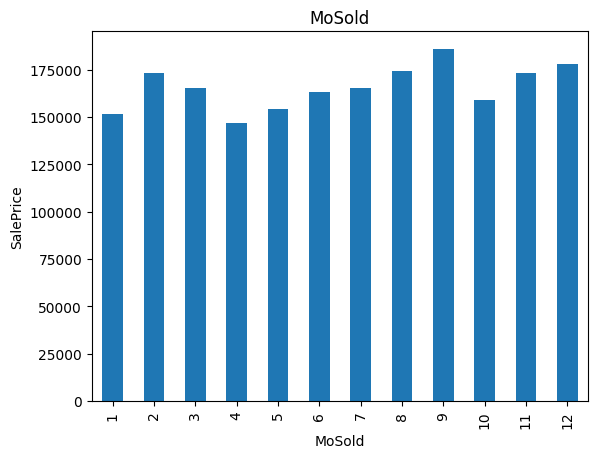

In [ ]:
for feature in discrete_feature:
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

#### Continuous Variable

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 14


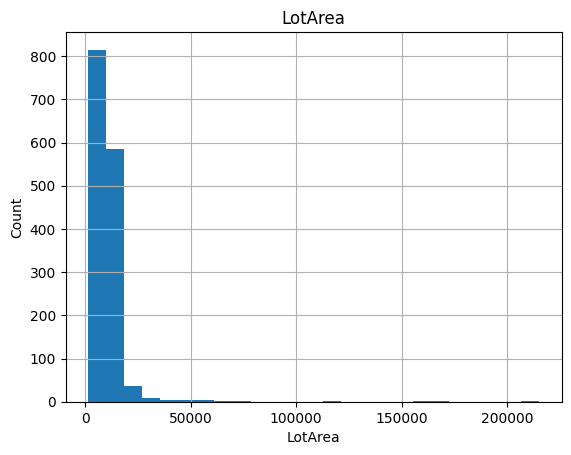

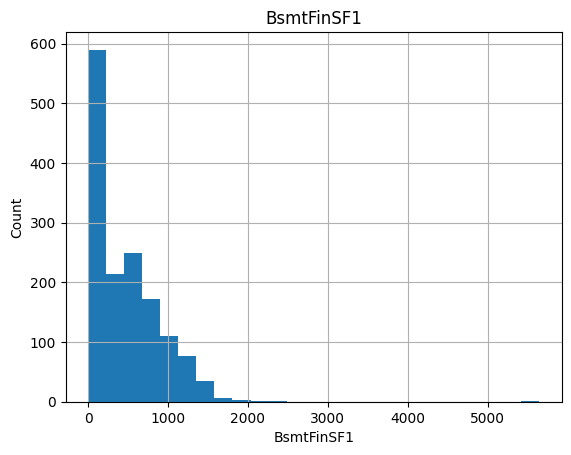

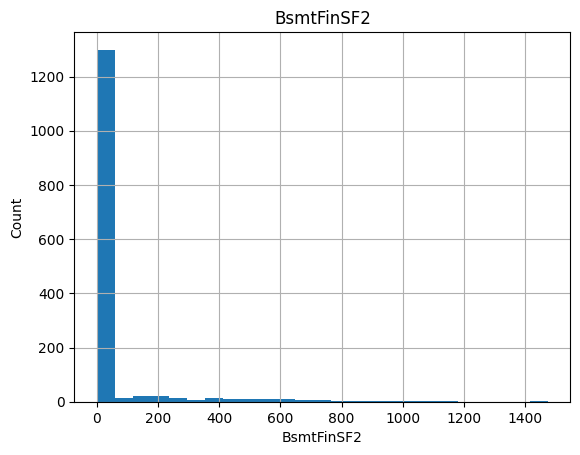

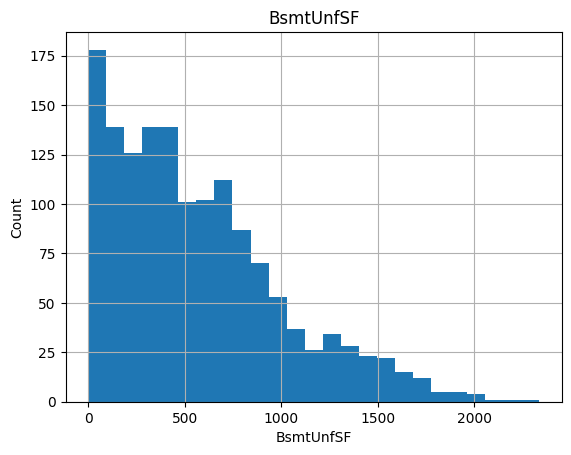

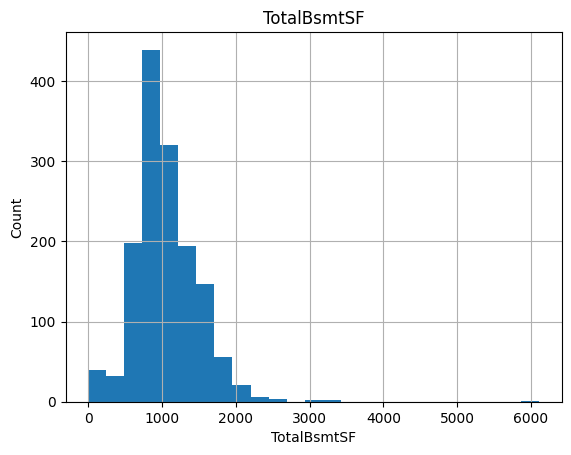

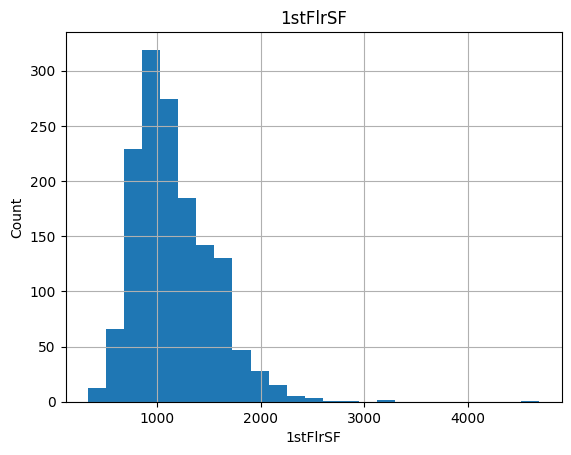

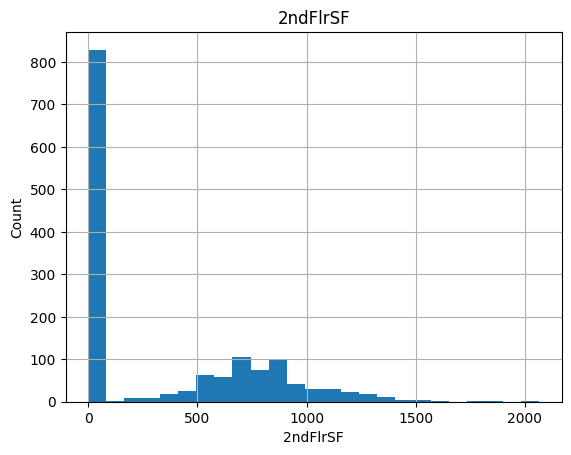

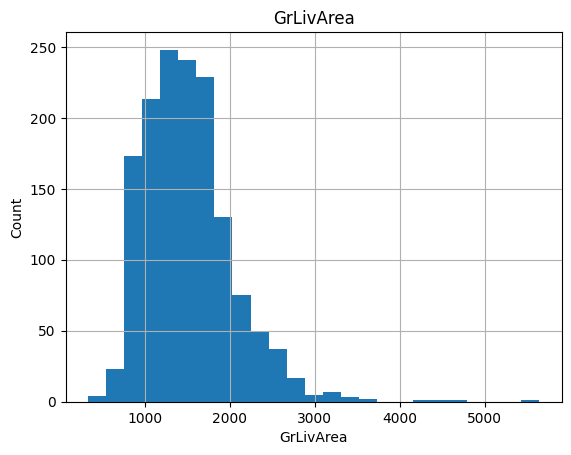

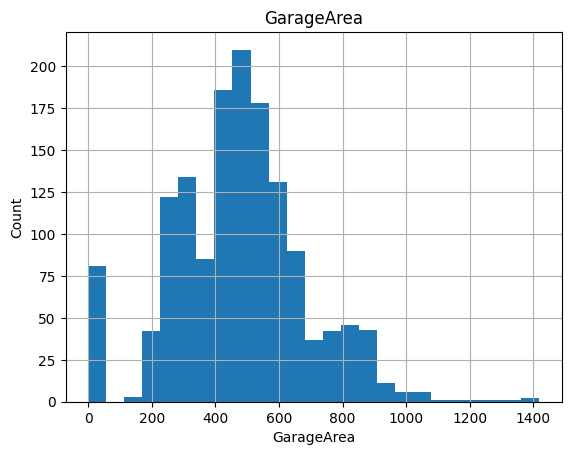

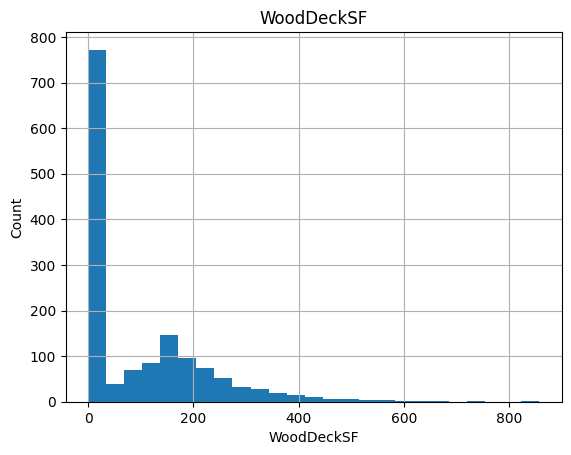

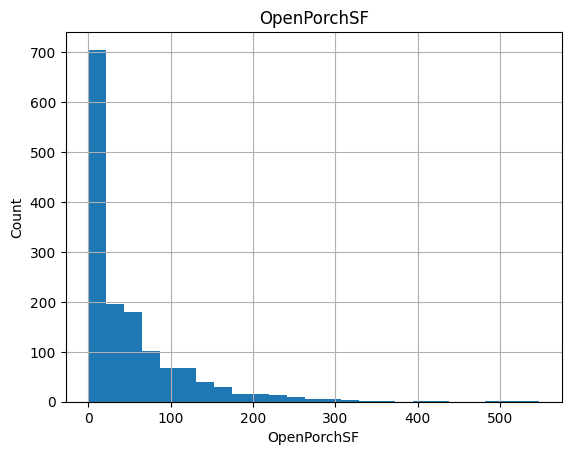

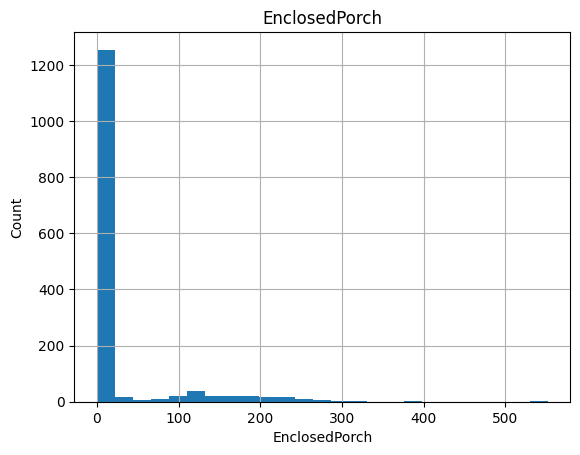

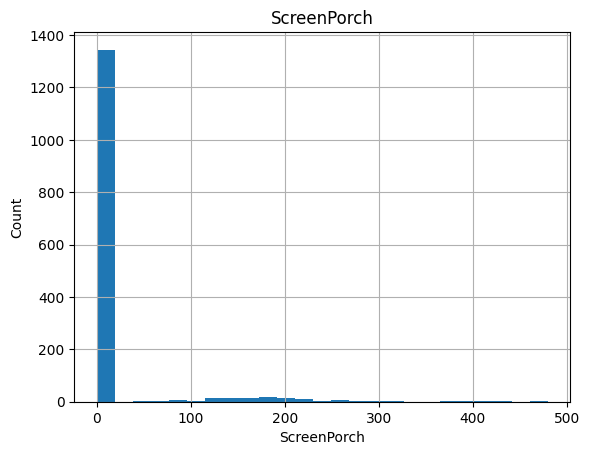

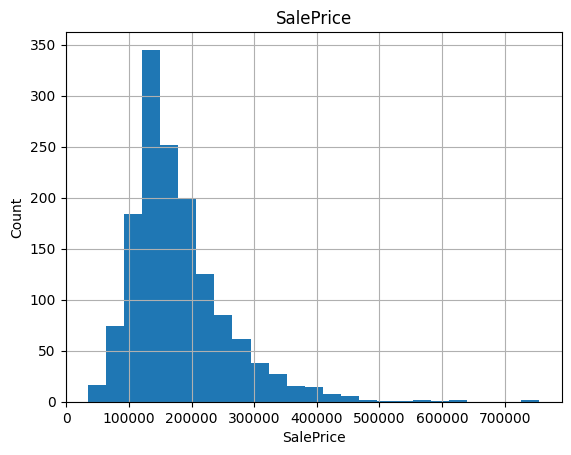

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

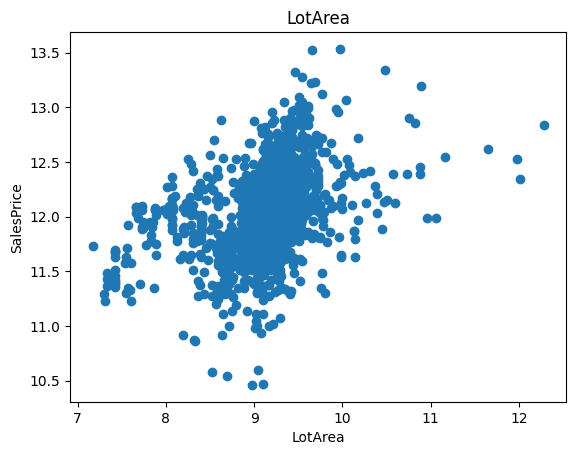

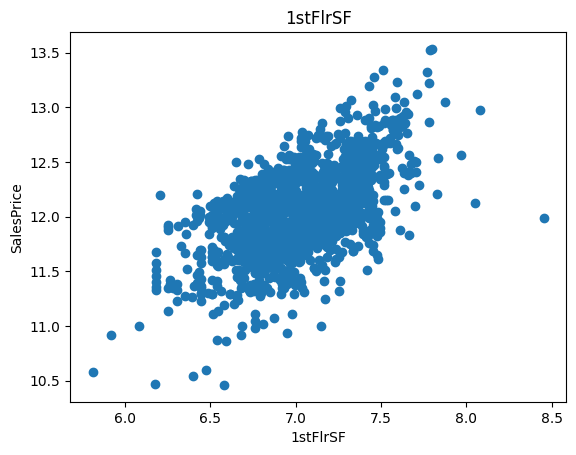

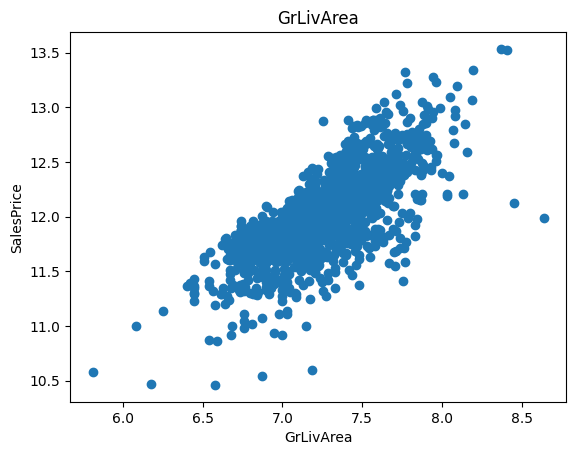

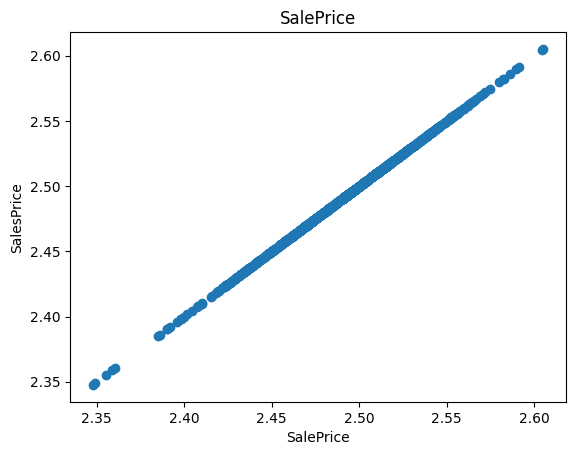

In [ ]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

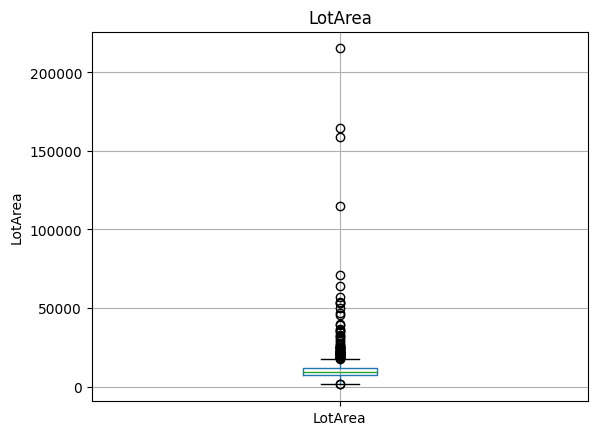

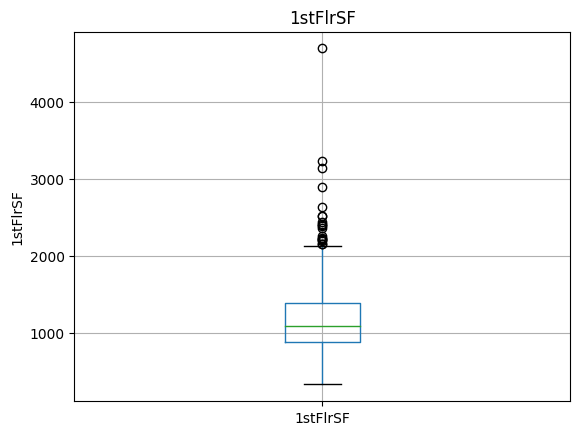

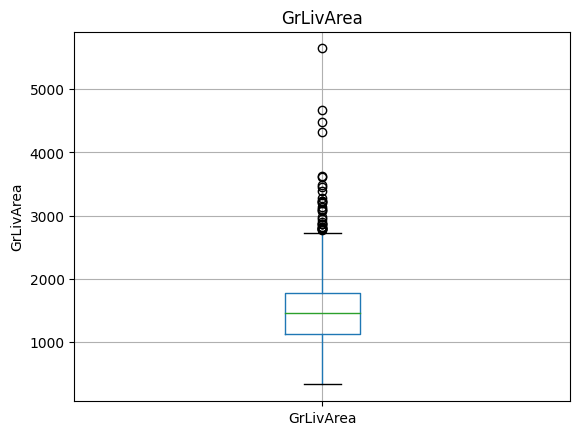

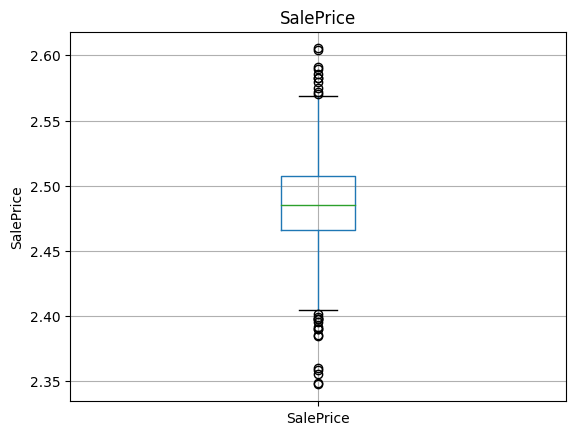

In [ ]:
for feature in continuous_feature:
  dataset = data.copy()
  if 0 in dataset[feature].unique():
    pass
  else:
    dataset[feature] = np.log(dataset[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Categorical Variable

In [ ]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']

In [ ]:
categorical_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
data[categorical_feature].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [ ]:
for feature in categorical_feature:
  print('The feature is {} and number of categories are {}'.format(feature, len(data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is ExterQual and number of categories are 4
The feature is ExterCond and number of c

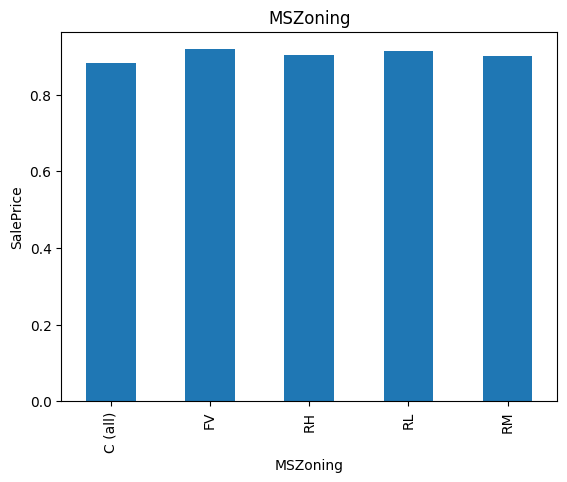

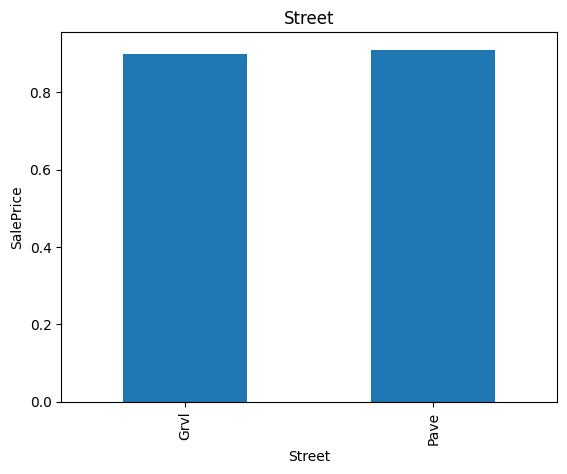

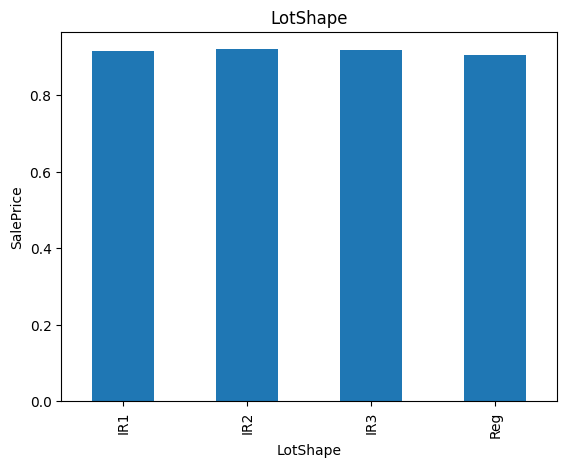

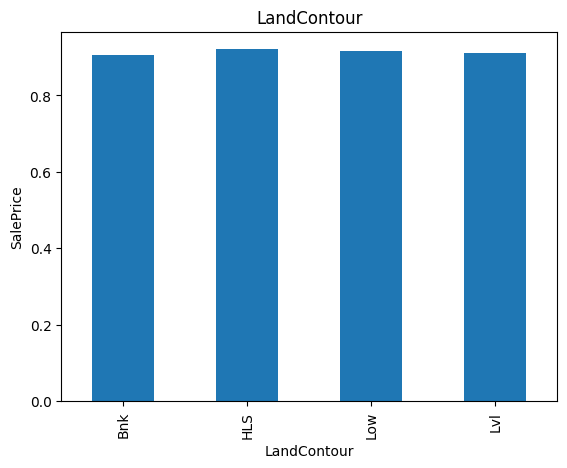

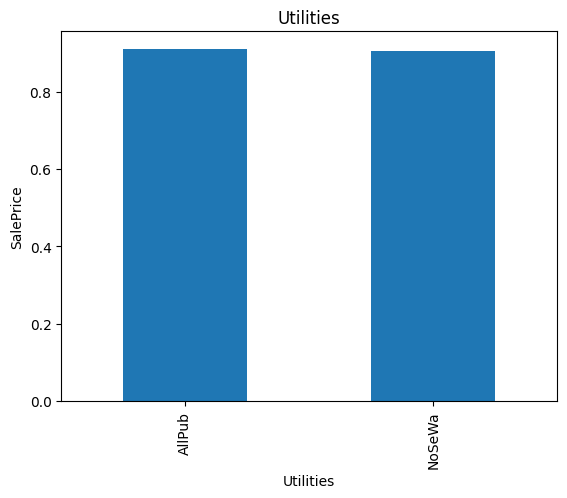

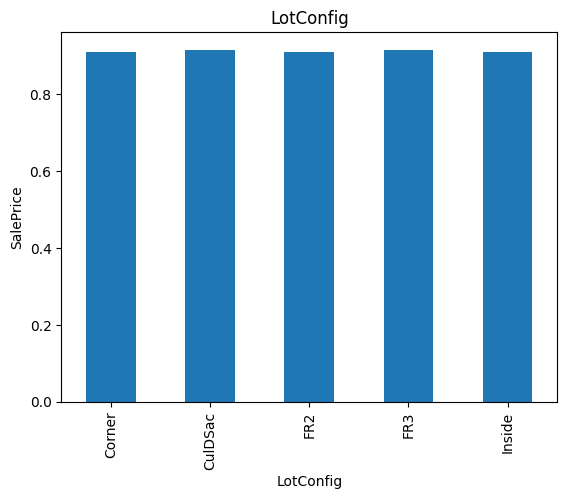

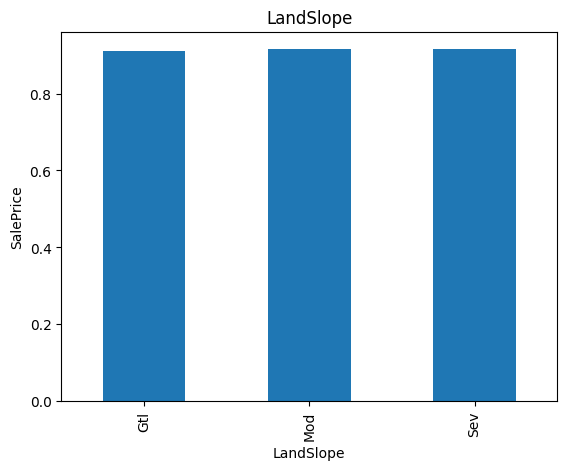

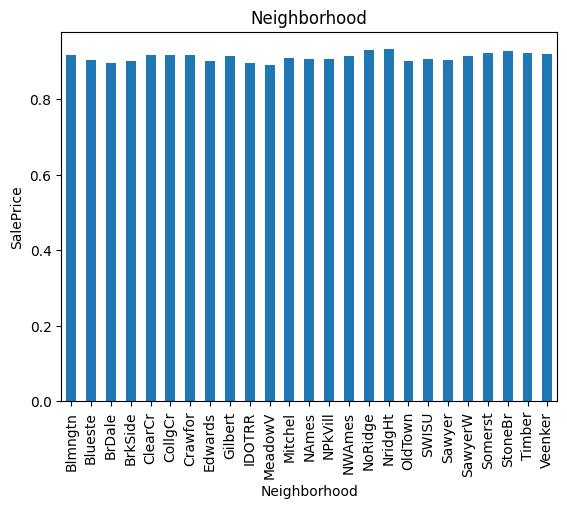

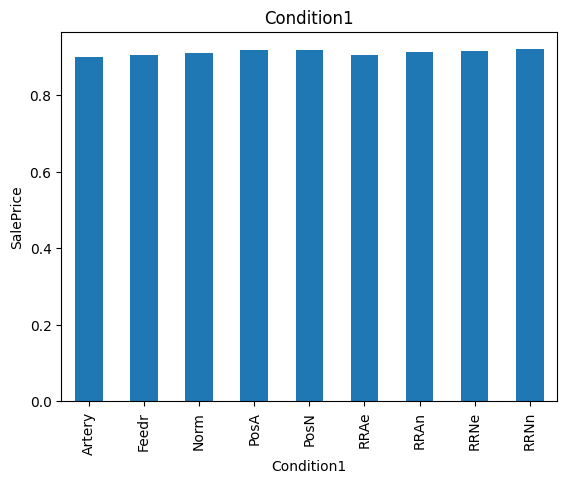

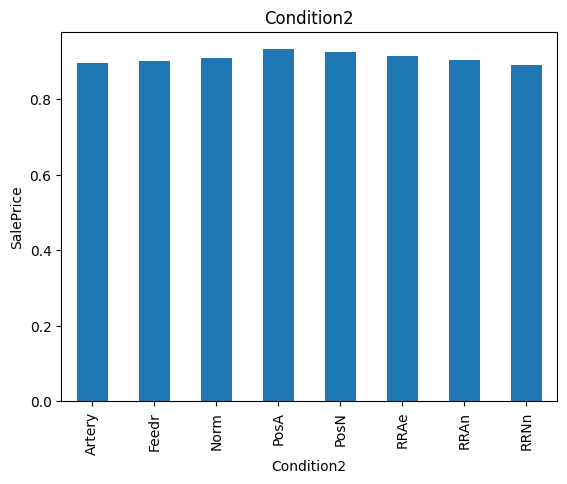

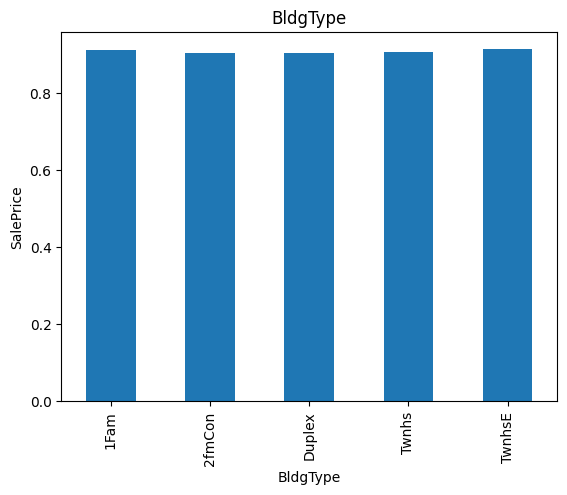

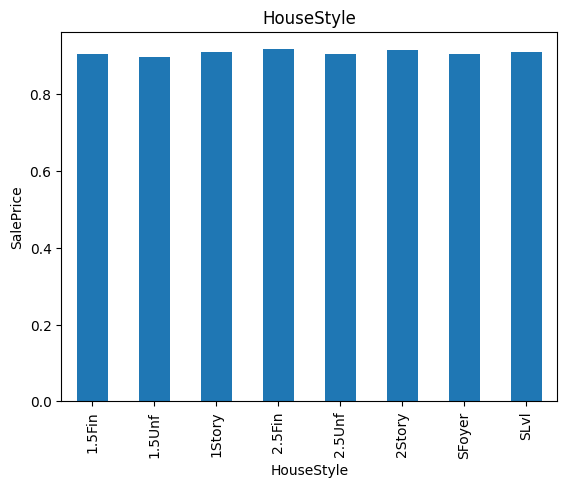

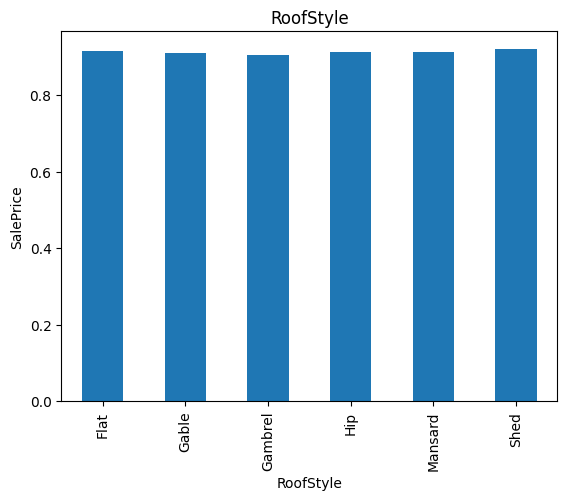

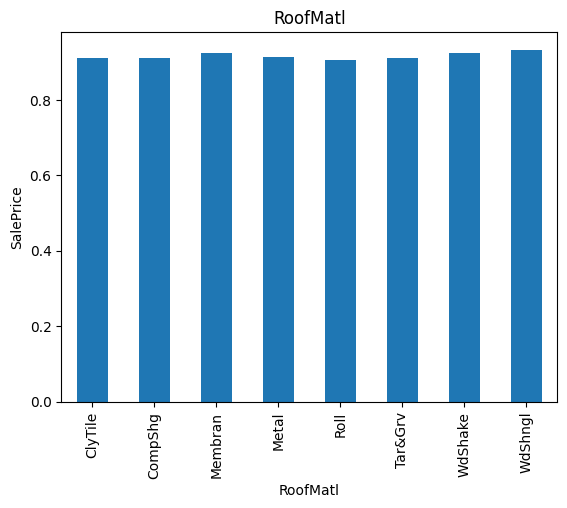

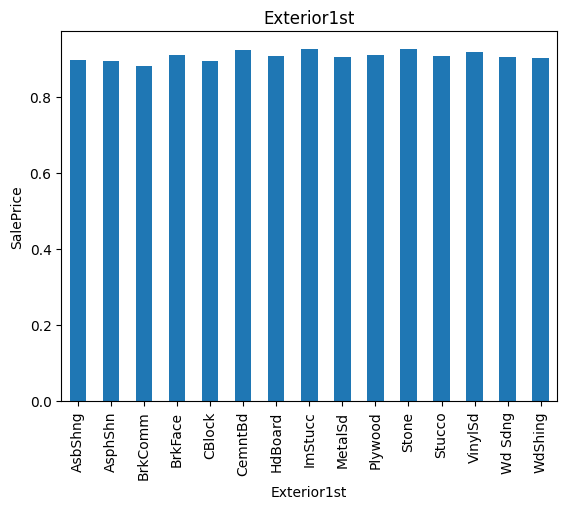

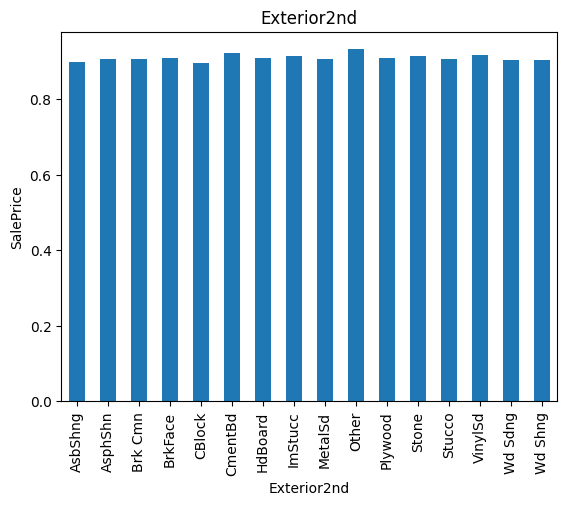

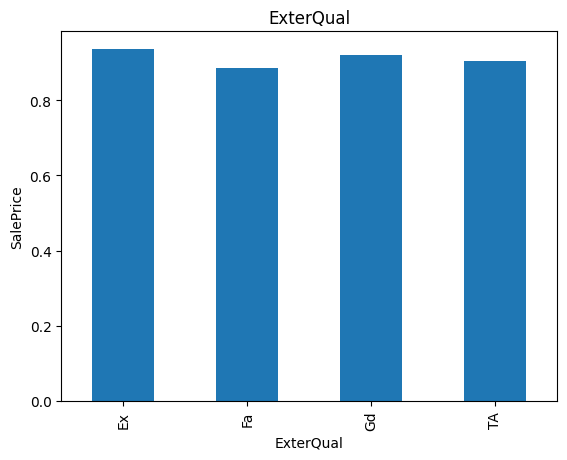

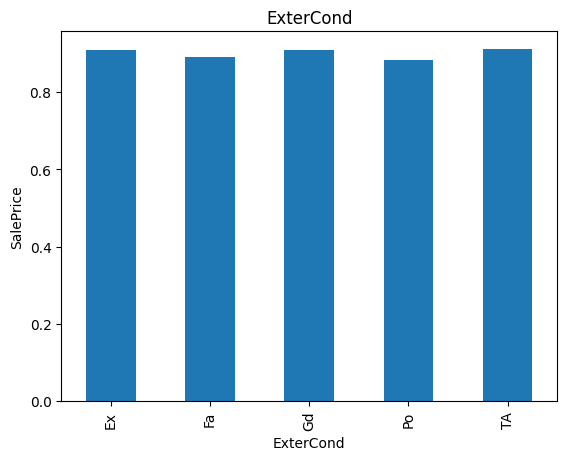

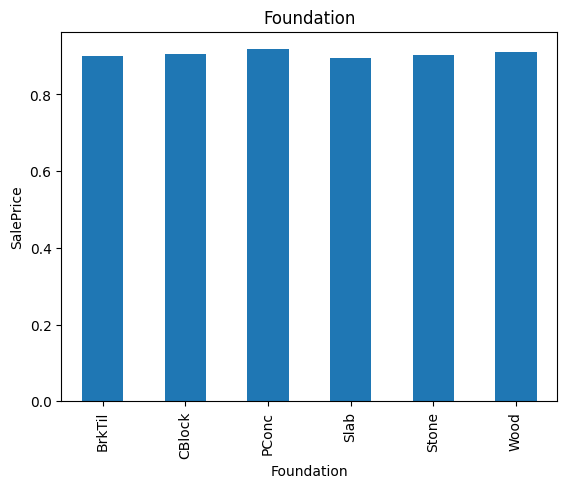

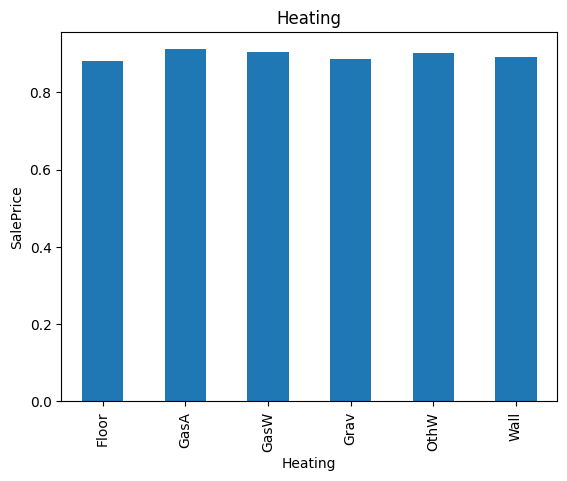

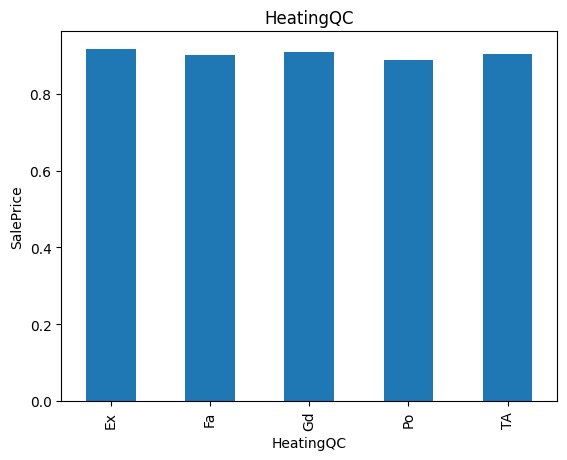

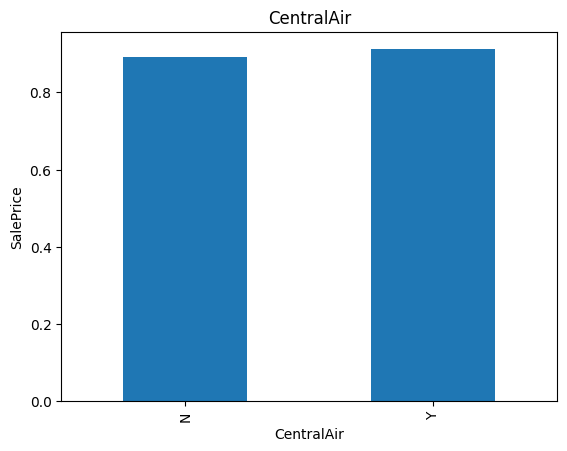

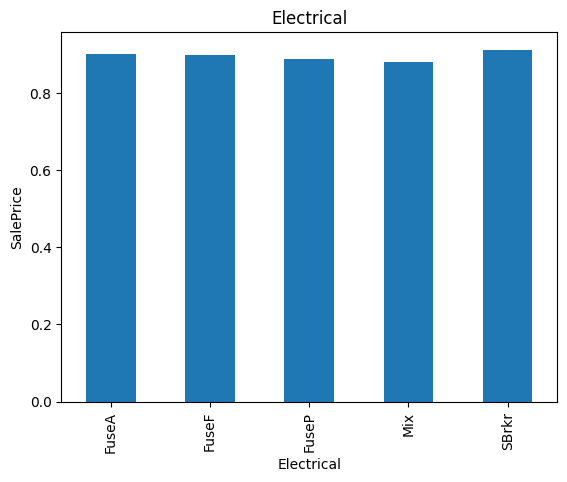

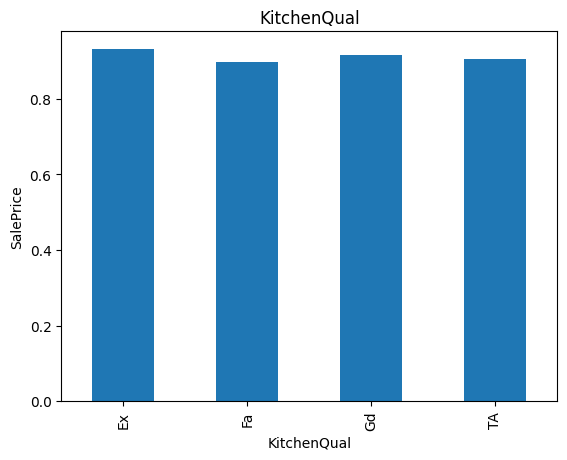

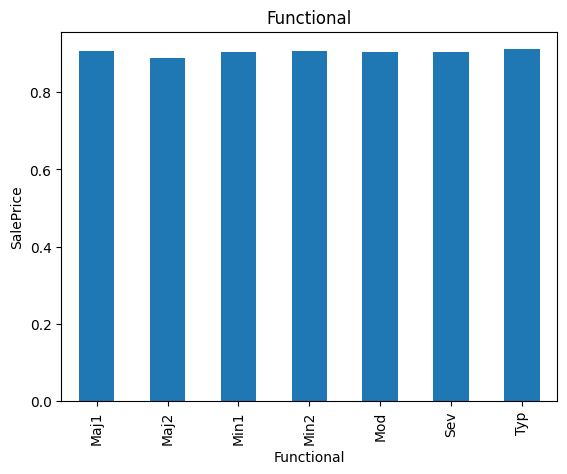

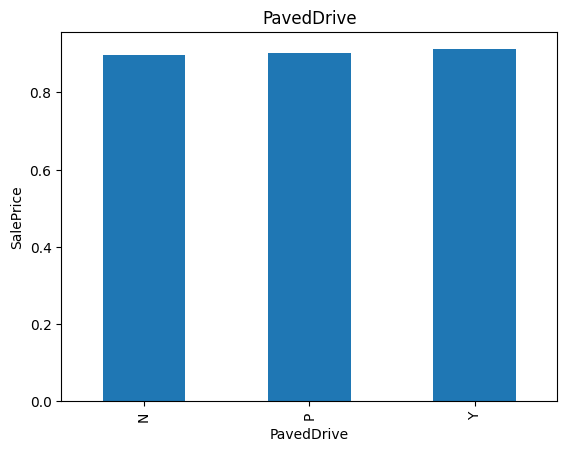

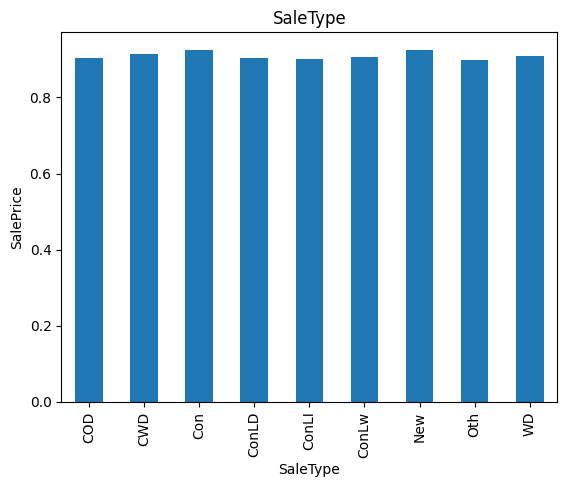

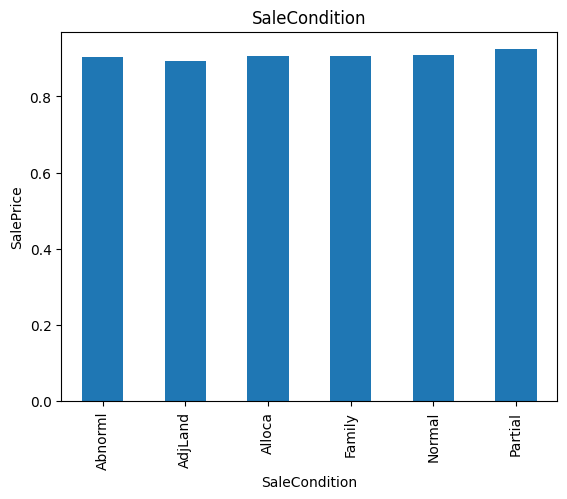

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()